In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [143]:
df=pd.read_csv("LoansTrainingSet.csv")

# EDA

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [145]:
df.isnull().sum()   #There are null values in 6 columns.

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job             11476
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [146]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


In [147]:
df.sample(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
241318,f043d0a2-c7f4-4f57-a2fc-6a3bf4593746,602c9743-c23b-4bec-9bd8-92c9ecdcaee1,Fully Paid,23772,Short Term,737.0,2 years,Own Home,99050.0,Debt Consolidation,"$1,541.05",15.6,NaN,15,0,18096,49579,0.0,0.0
54815,36923626-8908-493d-8bb0-a0b035eec301,19343e6d-1bfa-466d-af7c-31e7bd5d393e,Fully Paid,35539,Short Term,732.0,NaN,Home Mortgage,101540.0,Debt Consolidation,"$1,658.48",42.2,11.0,35,0,32540,162698,0.0,0.0
133094,846d262c-6194-4571-8305-32f6597834ec,99f30c49-5c6c-47f7-afaf-e3b2c68f8aae,Fully Paid,12919,Short Term,NaN,NaN,Home Mortgage,NaN,Debt Consolidation,$825.18,25.5,NaN,12,1,6442,23256,1.0,0.0
97583,610ffed4-027f-41c2-b746-2d961b72c8fe,429c1ebb-f748-40df-a0b2-5a137657ccc3,Fully Paid,6038,Short Term,693.0,4 years,Rent,36227.0,Debt Consolidation,$634.87,10.2,NaN,4,0,5012,5533,0.0,0.0
159952,9f1ae0a5-c4e5-4616-9f6d-9e7480166670,fe439d28-66a2-468a-a1d8-6b38d9df6326,Charged Off,10833,Long Term,NaN,1 year,Rent,NaN,Debt Consolidation,"$1,375.51",12.5,NaN,18,0,14738,22096,0.0,0.0
213496,d46da5b3-7b89-4354-a14b-a2f0b31a3945,19a429bc-d31d-4595-987f-8222b762616c,Fully Paid,7930,Long Term,707.0,4 years,Rent,38145.0,Debt Consolidation,$722.54,17.4,NaN,6,0,5398,6543,0.0,0.0
83705,531d5224-ac53-4121-8983-f46a43ea6643,e05007ec-f242-4bf9-85f0-a8fa01adcebf,Fully Paid,11034,Short Term,742.0,5 years,Home Mortgage,120372.0,Debt Consolidation,"$1,103.41",14.8,23.0,8,3,7964,10437,0.0,1.0
115437,72b6b95f-7443-4ddf-a8f7-c9abb0270e5d,953b0ca9-c44d-4bc2-a699-7e159a75b513,Fully Paid,6371,Short Term,750.0,3 years,Home Mortgage,48926.0,Debt Consolidation,$994.84,15.7,NaN,11,0,1565,11176,0.0,0.0
44847,2c9c3414-d01d-4aa0-80c4-4e6f1a757b70,d871a961-001d-4d70-9ca6-46b50f707ea5,Charged Off,2518,Short Term,721.0,< 1 year,Rent,35249.0,Debt Consolidation,$481.73,14.7,NaN,10,0,9837,13994,0.0,0.0
202407,c95b3435-bd87-40e9-a0c5-a6a7a7410ac6,cdca70e4-40d6-4c59-8b11-31860c6faf38,Fully Paid,17692,Short Term,720.0,5 years,Rent,103205.0,Debt Consolidation,"$2,339.30",20.8,NaN,11,1,14789,17796,1.0,0.0


In [148]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [149]:
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

## Loan Status - The Target

In [150]:
df["Loan Status"].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [151]:
df['Loan Status']=df['Loan Status'].replace(['Fully Paid','Charged Off'],[1,0])

In [152]:
df["Loan Status"].unique()

array([1, 0])

In [153]:
abs(df.corr()['Loan Status']).sort_values(ascending=False)

Loan Status                     1.000000
Credit Score                    0.440307
Current Loan Amount             0.269804
Annual Income                   0.070328
Years of Credit History         0.035548
Months since last delinquent    0.023541
Number of Open Accounts         0.020787
Tax Liens                       0.012585
Number of Credit Problems       0.010179
Current Credit Balance          0.008838
Bankruptcies                    0.001154
Name: Loan Status, dtype: float64

## Bankruptcies

In [154]:
df.Bankruptcies.unique()

array([ 0.,  1.,  2., nan,  3.,  4.,  5.,  7.,  6.])

In [155]:
df.Bankruptcies=df.Bankruptcies.fillna(df['Bankruptcies'].mean())

## Tax Liens

In [156]:
df["Tax Liens"]=df["Tax Liens"].fillna(df["Tax Liens"].mean())

## Years in current job

In [157]:
df['Years in current job'].unique()

array(['10+ years', '4 years', '6 years', '5 years', nan, '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'],
      dtype=object)

In [158]:
df['Years in current job']=df['Years in current job'].replace('< 1 year',"0")

In [159]:
df['Years in current job']=df['Years in current job'].str.extract("(\d*)")

In [160]:
df['Years in current job'].unique()

array(['10', '4', '6', '5', nan, '3', '2', '0', '1', '7', '9', '8'],
      dtype=object)

In [161]:
df['Years in current job']=df['Years in current job'].fillna('0')


In [162]:
df['Years in current job'].value_counts()

10    78896
0     32488
2     23462
3     20659
5     17864
1     16746
4     16166
6     14597
7     13968
8     12206
9      9932
Name: Years in current job, dtype: int64

In [163]:
#df['Years in current job']=df['Years in current job'].astype("int")

## Credit Score

In [164]:
df['Credit Score']=df['Credit Score'].fillna(df['Credit Score'].median())  #median is less sensitive to extreme values.
                                                                           #Increase number of median values does not affect mean so much.

## Annual Income

In [165]:
df['Annual Income']=df['Annual Income'].fillna(df.groupby('Years in current job')['Annual Income'].transform("median"))

In [166]:
#df.groupby('Years in current job')['Annual Income'].mean() #mean is very sensitive to outliers.ıt may manipulate our results.

## Home Ownership

In [167]:
df["Home Ownership"].unique()

array(['Home Mortgage', 'Own Home', 'Rent', 'HaveMortgage'], dtype=object)

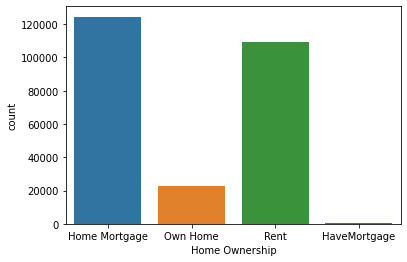

In [168]:
sns.countplot(df['Home Ownership'])

In [169]:
df['Home Ownership']=df['Home Ownership'].replace('HaveMortgage','Home Mortgage')

In [170]:
df["Home Ownership"].unique()

array(['Home Mortgage', 'Own Home', 'Rent'], dtype=object)

## 'Months since last delinquent'

In [171]:
df['Months since last delinquent'].unique()

array([ 41.,  nan,  73.,  29.,  43.,  79.,   2.,  15.,  27.,   5.,  55.,
        21.,  56.,  25.,  67.,  37.,  74.,  45.,  76.,  46.,  35.,  60.,
        28.,  34.,  13.,   7.,  17.,  22.,  42.,  53.,  12.,  39.,  71.,
        20.,  38.,   0.,  81.,  78.,  44.,  63.,  77.,  49.,  30.,  70.,
        26.,  14.,   8.,  52.,  68.,  75.,  51.,  59.,  40.,   4.,  18.,
        47.,  24.,  31.,  69.,  32.,  36.,  16.,  10.,  62.,   9.,  11.,
        66.,  58.,  54.,   3.,  50.,  82.,  61.,  72.,  57.,  23.,  19.,
        80.,   6.,   1.,  86.,  48.,  33.,  65.,  64.,  84.,  83., 104.,
        90., 149.,  96., 110.,  99.,  91.,  95., 152.,  87., 131., 100.,
       116., 106., 107.,  85.,  89., 101., 122.,  93., 135., 139.,  88.,
       148.,  92.,  94., 114., 143., 115., 108., 140., 130.,  98.,  97.,
       120., 102., 176., 151., 118., 109., 134., 112., 113., 133., 119.])

In [172]:
df['Months since last delinquent'].isnull().sum() * 100 / len(df) #becuse the missing values more than %50 I will not use this feature.


54.627136319770884

## Dropped Features 

In [174]:
df.drop(['Months since last delinquent','Loan ID', 'Customer ID','Monthly Debt', 'Years of Credit History','Maximum Open Credit','Years of Credit History'],axis=1,inplace=True)

In [175]:
df.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Credit Score',
       'Years in current job', 'Home Ownership', 'Annual Income', 'Purpose',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

# MODELLING

In [176]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [183]:
def classalgo_test(x_train,x_test,y_train,y_test): #classification
      
    g=GaussianNB()
    b=BernoulliNB()
    kc=KNeighborsClassifier()
    lr=LogisticRegression()
    dc=DecisionTreeClassifier()
    rfc=RandomForestClassifier()
    gbc=GradientBoostingClassifier()
    
    algos = [g,b,kc,lr,dc,rfc,gbc]
    algo_names = ['GaussianNB','BernoulliNB','KNeighborsClassifier','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier']
    accsc=[]
    precsc=[]
    
    result = pd.DataFrame(columns = ['Accuracy Score','Precision Score'],index = algo_names)
    
    for algo in algos:
    
        algo.fit(x_train,y_train)
        pred=algo.predict(x_test)
        accsc.append(accuracy_score(pred,y_test))
        precsc.append(precision_score(pred,y_test))
    
    result['Accuracy Score'] = accsc
    result['Precision Score'] = precsc
        
    return result.sort_values('Accuracy Score', ascending=False)

In [179]:
x=df.drop("Loan Status",axis=1)
y=df["Loan Status"]

In [180]:
x=pd.get_dummies(x,drop_first=True)

In [181]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [182]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((205587, 30), (51397, 30), (205587,), (51397,))

In [185]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
tahmin1=gbc.predict(x_test)
print(classification_report(tahmin1,y_test))

              precision    recall  f1-score   support

           0       0.34      0.77      0.48      7269
           1       0.95      0.76      0.85     44128

    accuracy                           0.76     51397
   macro avg       0.65      0.76      0.66     51397
weighted avg       0.87      0.76      0.79     51397



In [186]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
tahmin2=rfc.predict(x_test)
print(classification_report(tahmin2,y_test))


              precision    recall  f1-score   support

           0       0.62      0.80      0.70     12506
           1       0.93      0.84      0.88     38891

    accuracy                           0.83     51397
   macro avg       0.77      0.82      0.79     51397
weighted avg       0.85      0.83      0.84     51397



In [187]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
tahmin3=lr.predict(x_test)
print(classification_report(tahmin3,y_test))

              precision    recall  f1-score   support

           0       0.23      0.82      0.36      4617
           1       0.98      0.74      0.84     46780

    accuracy                           0.74     51397
   macro avg       0.60      0.78      0.60     51397
weighted avg       0.91      0.74      0.80     51397



F1 Score is the weighted average of Precision and Recall.

In [188]:
confusion_matrix(tahmin1,y_test) #GradientBoosting<

array([[ 5566,  1703],
       [10595, 33533]])

In [189]:
confusion_matrix(tahmin2,y_test) #RandomForest

array([[ 9975,  2531],
       [ 6186, 32705]])

In [190]:
confusion_matrix(tahmin3,y_test) #Logistic

array([[ 3767,   850],
       [12394, 34386]])

In [184]:
classalgo_test(x_train,x_test,y_train,y_test)

,Accuracy Score,Precision Score
RandomForestClassifier,0.830691,0.929021
GradientBoostingClassifier,0.760725,0.951669
DecisionTreeClassifier,0.752845,0.786497
LogisticRegression,0.742320,0.975877
KNeighborsClassifier,0.717085,0.843739
BernoulliNB,0.688776,0.970428
GaussianNB,0.449034,0.196674


Accuracy is how close a value is to its true value. An example is how close an arrow gets to the bull's-eye center. 

Precision is how repeatable a measurement is. An example is how close a second arrow is to the first one (regardless of whether either is near the mark).

In [ ]:
# We get the best results with RandomForestClassifier